In [4]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics

X = np.loadtxt('cluster_data.txt')

In [5]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Silhouette Coefficient: -0.354


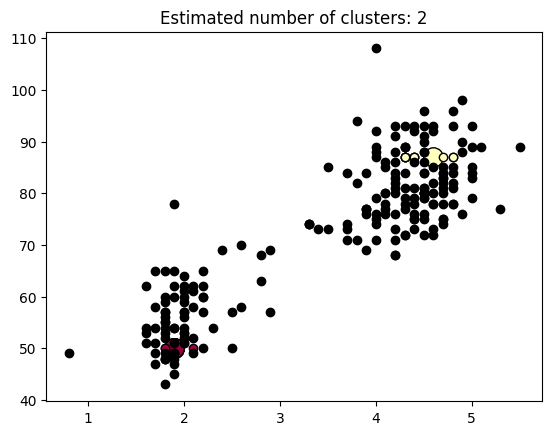

In [6]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_);

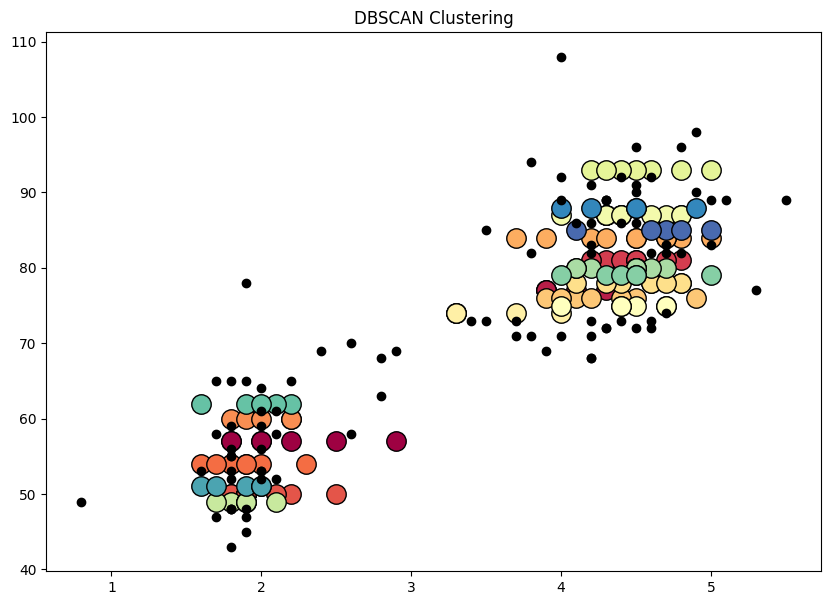

In [7]:
# Load the provided Jupyter notebook
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


# Load data
data = pd.read_csv('cluster_data.txt', delimiter=' ', header=None)
X = data.values

# Plotting function
def plot_dbscan(X, labels):
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & (labels != -1)]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & (labels == -1)]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title('DBSCAN Clustering')
    plt.show()

# Initial DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5).fit(X)
labels = db.labels_

# Plot initial results
plot_dbscan(X, labels) 


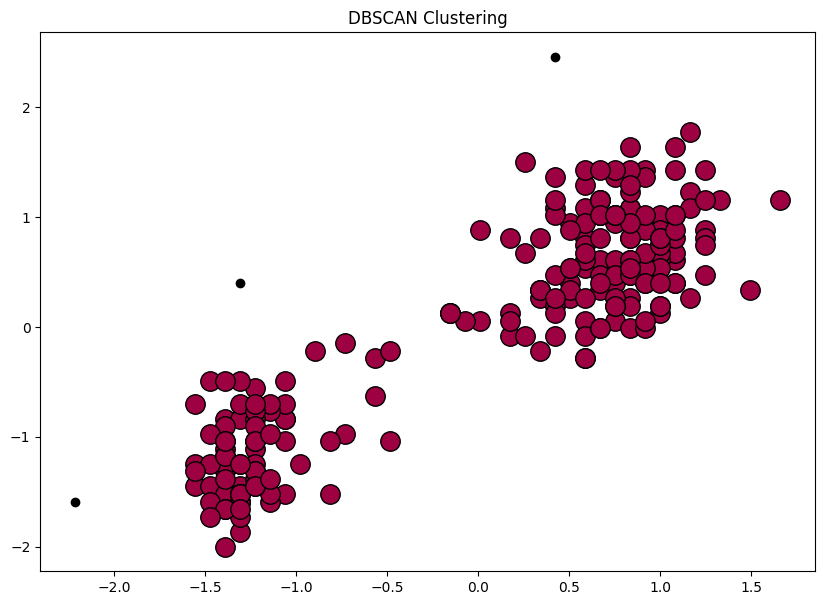

In [8]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN clustering on standardized data
db_scaled = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)
labels_scaled = db_scaled.labels_

# Plot results after standardization
plot_dbscan(X_scaled, labels_scaled)


Best parameters: eps=0.4, min_samples=2
Best silhouette score: 0.7010237409550193


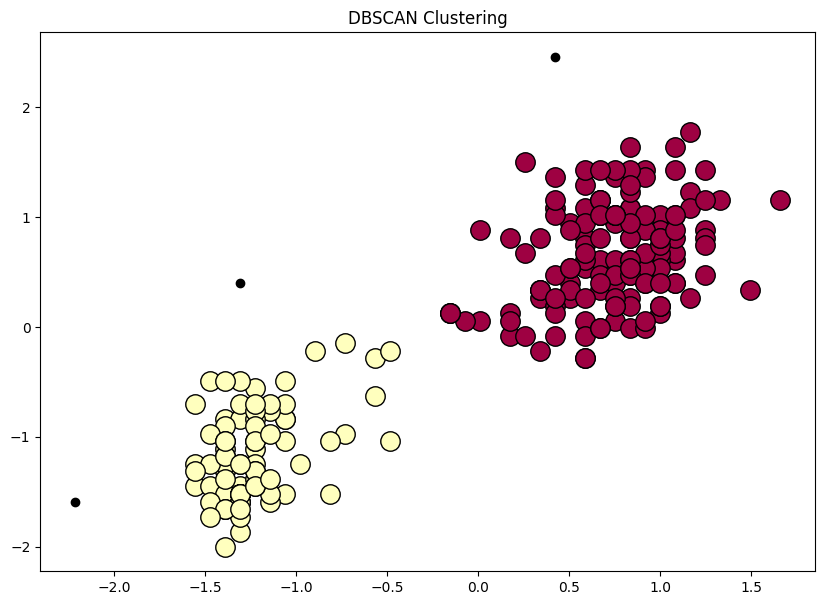

In [10]:
from sklearn.metrics import silhouette_score

# Function to evaluate DBSCAN with different parameters
def evaluate_dbscan(X, eps_values, min_samples_values):
    best_score = -1
    best_params = None
    best_labels = None
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            labels = db.labels_
            if len(set(labels)) > 1:  # More than one cluster
                score = silhouette_score(X, labels)
                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)
                    best_labels = labels
    
    return best_params, best_score, best_labels

# Define parameter ranges to search
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(2, 10)

# Evaluate DBSCAN
best_params, best_score, best_labels = evaluate_dbscan(X_scaled, eps_values, min_samples_values)

print(f'Best parameters: eps={best_params[0]}, min_samples={best_params[1]}')
print(f'Best silhouette score: {best_score}')

# Plot best clustering result
plot_dbscan(X_scaled, best_labels)
